# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [7]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [11]:
# Extract all rows of data
rows = html_soup.find_all('tr', class_= 'data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
# Create an empty list
row_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    row_list.append(row)

In [19]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(row_list, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [23]:
# Confirm DataFrame was created successfully
mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examine data type of each column
mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [29]:
# Change data types for data analysis
mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date)
mars_df.sol = mars_df.sol.astype('int')
mars_df.ls = mars_df.ls.astype('int')
mars_df.month = mars_df.month.astype('int')
mars_df.min_temp = mars_df.min_temp.astype('float')
mars_df.pressure = mars_df.pressure.astype('float')

In [31]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [77]:
# 1. How many months are there on Mars?
months_on_mars = mars_df['month'].value_counts().sort_index()
months_on_mars


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [85]:
print(f"There are {months_on_mars.count()} months on Mars")

There are 12 months on Mars


In [43]:
# 2. How many sols (Martian days) worth of data are there?
days_on_mars = mars_df['sol'].nunique()
days_on_mars

1867

In [81]:
print(f"There are {days_on_mars} days on Mars")

There are 1867 days on Mars


In [97]:
# 3. What is the average minimum temperature by month?
avg_monthly_min_temp = mars_df.groupby('month')['min_temp'].mean()
print(f"This is the average monthly minimum temperature by month")
avg_monthly_min_temp

This is the average monthly minimum temperature by month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

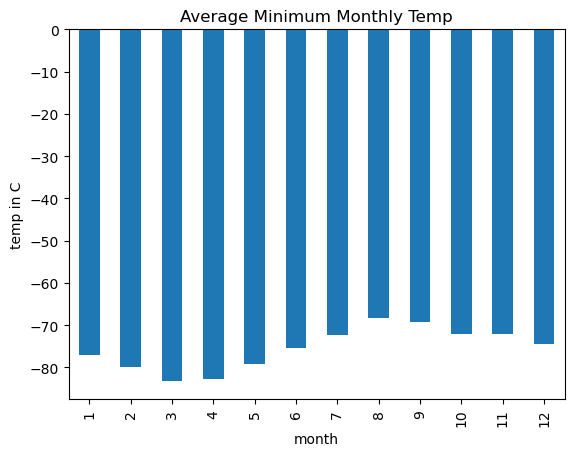

In [53]:
# Plot the average minimum temperature by month
avg_monthly_min_temp.plot(kind='bar')
plt.title('Average Minimum Monthly Temp')
plt.ylabel('temp in C')
plt.show

The coldest month is Month 3 and the hotteset month is month 8.


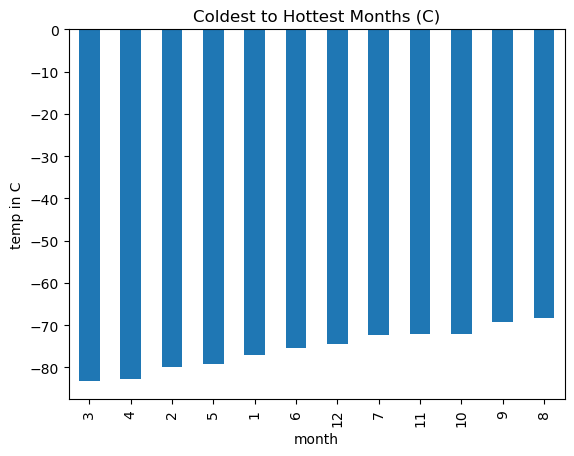

In [99]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_monthly_min_temp.sort_values().plot(kind='bar')
plt.title('Coldest to Hottest Months (C)')
plt.ylabel('temp in C')
plt.show

print(f"The coldest month is Month 3 and the hotteset month is month 8.")

In [57]:
# 4. What is the average pressure by month?
pressure_by_month = mars_df.groupby('month')['pressure'].mean()
pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

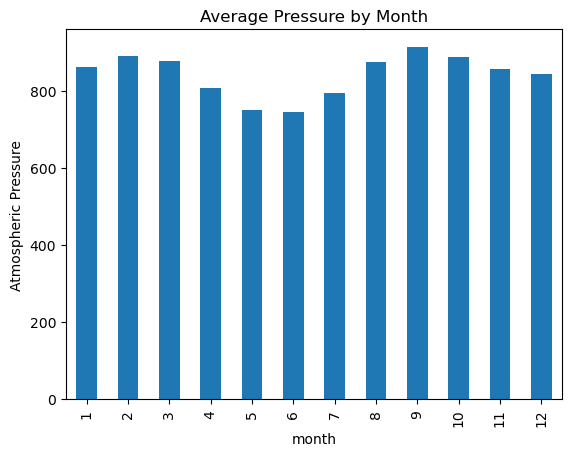

In [61]:
# Plot the average pressure by month
pressure_by_month.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure')
plt.show

the lowest average monthly pressure is month 6 and the highest pressure average is month 9


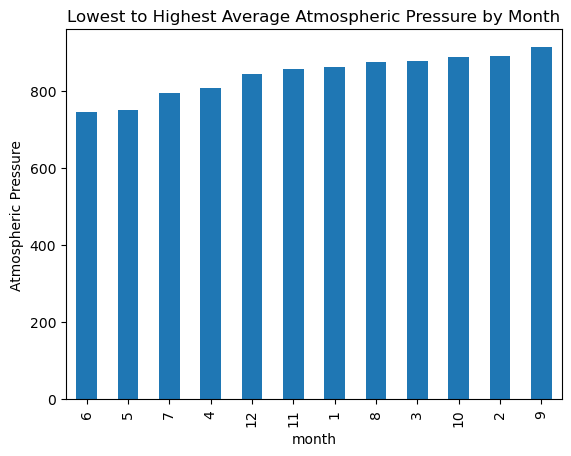

In [101]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_by_month.sort_values().plot(kind='bar')
plt.title('Lowest to Highest Average Atmospheric Pressure by Month')
plt.ylabel('Atmospheric Pressure')
plt.show

print(f"the lowest average monthly pressure is month 6 and the highest pressure average is month 9")

total martian days is 1867


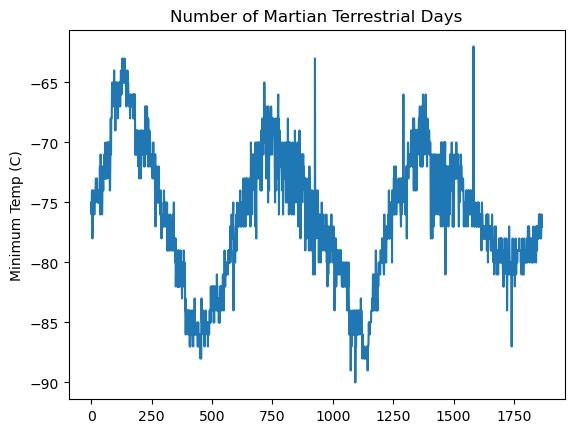

In [103]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df.min_temp.plot()
plt.title('Number of Martian Terrestrial Days')
plt.ylabel('Minimum Temp (C)')
plt.show
print(f"total martian days is {days_on_mars}")

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [105]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [107]:
browser.quit()